<a href="https://colab.research.google.com/github/SOwens-Create/BabyPython/blob/master/LinearRegressionQuizWeek1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#Import libraries for dataframe methods
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import tree
from os import system
from statistics import mean
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error

#Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import plotly.express as px

In [3]:
df=pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='charges', ylabel='Count'>

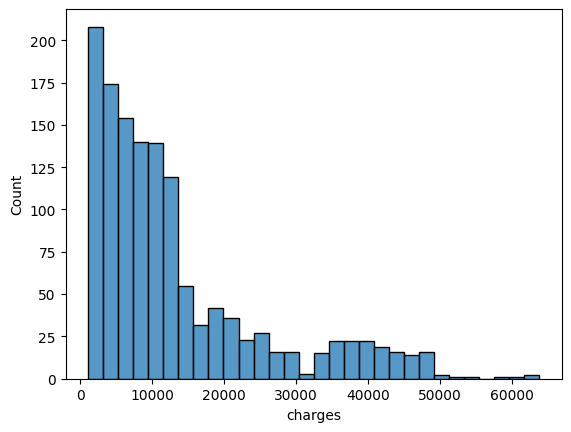

In [9]:
sns.histplot(df['charges'])

In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [12]:
pd.get_dummies(df['region'], drop_first=True)

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [17]:
df['age']=df['age'].astype(int)

In [20]:
pd.get_dummies(df['smoker'], drop_first=False)

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [18]:
pd.get_dummies(df['sex'], drop_first=False)

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [26]:
df=pd.concat([df.drop('sex', axis=1), pd.get_dummies(df['sex'])], axis=1)

In [28]:
df=pd.concat([df.drop('smoker', axis=1), pd.get_dummies(df['smoker'])], axis=1)

In [29]:
df=pd.concat([df.drop('region', axis=1), pd.get_dummies(df['region'])], axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   charges    1338 non-null   float64
 4   female     1338 non-null   uint8  
 5   male       1338 non-null   uint8  
 6   no         1338 non-null   uint8  
 7   yes        1338 non-null   uint8  
 8   northeast  1338 non-null   uint8  
 9   northwest  1338 non-null   uint8  
 10  southeast  1338 non-null   uint8  
 11  southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [31]:
df['bmi']=df['bmi'].astype(int)
df['charges']=df['charges'].astype(int)
df['female']=df['female'].astype(int)
df['male']=df['male'].astype(int)
df['no']=df['no'].astype(int)
df['yes']=df['yes'].astype(int)
df['northeast']=df['northeast'].astype(int)
df['northwest']=df['northwest'].astype(int)
df['southeast']=df['southeast'].astype(int)
df['southwest']=df['southwest'].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        1338 non-null   int64
 1   bmi        1338 non-null   int64
 2   children   1338 non-null   int64
 3   charges    1338 non-null   int64
 4   female     1338 non-null   int64
 5   male       1338 non-null   int64
 6   no         1338 non-null   int64
 7   yes        1338 non-null   int64
 8   northeast  1338 non-null   int64
 9   northwest  1338 non-null   int64
 10  southeast  1338 non-null   int64
 11  southwest  1338 non-null   int64
dtypes: int64(12)
memory usage: 125.6 KB


In [33]:
#Prep data for train, test, split by dropping the dependent variable.
x=df.drop('charges', axis=1)
y=df['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

x_train.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
744,50,26,0,0,1,1,0,0,1,0,0
363,21,26,1,1,0,1,0,0,0,0,1
10,25,26,0,0,1,1,0,1,0,0,0
970,50,28,3,1,0,1,0,0,0,1,0
634,51,39,1,0,1,1,0,0,0,0,1


In [34]:
x_test.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
559,19,35,0,0,1,1,0,0,1,0,0
1087,57,31,0,0,1,1,0,0,1,0,0
1020,51,37,0,0,1,1,0,0,0,0,1
460,49,36,3,1,0,1,0,0,0,1,0
802,21,22,1,0,1,1,0,0,0,0,1


In [54]:
#>>> reg = LinearRegression().fit(X, y)
#>>> reg.score(X, y)
#1.0
#>>> reg.coef_
#array([1., 2.])
#>>> reg.intercept_
#3.0...
#>>> reg.predict(np.array([[3, 5]]))
#array([16.])


reg=LinearRegression().fit(x, y)
reg.score(x, y)

#rmse=np.sqrt(mean_squared_error(y,y_train))
#r2=r2_score(y,y_train)

#print(rmse)
#print(r2)

0.7508828216439194

In [45]:
polynomial_features=PolynomialFeatures(degree=2, interaction_only=True)

In [46]:
x_poly=polynomial_features.fit_transform(x)

In [49]:
model=LinearRegression()
model.fit(x_poly,y)
y_poly_pred=model.predict(x_poly)

rmse=np.sqrt(mean_squared_error(y,y_poly_pred))
r2=r2_score(y,y_poly_pred)

print(rmse)
print(r2)

4770.283173557228
0.8447170311121467


In [50]:
polynomial_features=PolynomialFeatures(degree=2, interaction_only=True)
x_poly=polynomial_features.fit_transform(x_train)

model=LinearRegression()
model.fit(x_poly,y_train)
y_poly_pred=model.predict(x_poly)

rmse=np.sqrt(mean_squared_error(y_train,y_poly_pred))
r2=r2_score(y_train,y_poly_pred)

print(rmse)
print(r2)

4813.522250058865
0.844094336671741


In [59]:
model=LinearRegression()
model.fit(x_test,y_test)
y_pred = model.predict(x_test)
mean_absolute_error(y_test, y_pred)

4192.968408518514